In [3]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('meteorite-landings.csv')
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [5]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45428 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [6]:
df['year'] = df['year'].astype(pd.Int64Dtype())

In [7]:
#sorting data based on year
df.sort_values(by=['year'], inplace=True)

In [8]:
df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
16356,Havana,11857,Valid,"Iron, IAB complex",NaN,Found,301,40.33333,-90.05000,"(40.333330, -90.050000)"
38301,Wietrzno-Bobrka,24259,Valid,Iron,376.0,Found,601,49.41667,21.70000,"(49.416670, 21.700000)"
703,Nogata,16988,Valid,L6,472.0,Fell,860,33.72500,130.75000,"(33.725000, 130.750000)"
678,Narni,16914,Valid,Stone-uncl,NaN,Fell,920,42.51667,12.51667,"(42.516670, 12.516670)"
278,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,1399,50.18333,12.73333,"(50.183330, 12.733330)"
...,...,...,...,...,...,...,...,...,...,...
38128,Um-Hadid,24114,Valid,Mesosiderite,15400.0,Found,<NA>,21.69500,50.59667,"(21.695000, 50.596670)"
38201,Valencia,24147,Valid,H5,33500.0,Found,<NA>,39.00000,-0.03333,"(39.000000, -0.033330)"
38224,Villa Regina,53827,Valid,"Iron, IIIAB",5030.0,Found,<NA>,-39.10000,-67.06667,"(-39.100000, -67.066670)"
38328,Wiltshire,56143,Valid,H5,92750.0,Found,<NA>,51.14967,-1.81000,"(51.149670, -1.810000)"


In [9]:
df[df['year']>2024]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
30679,Northwest Africa 7701,57150,Valid,CK6,55.0,Found,2101,0.0,0.00000,"(0.000000, 0.000000)"
38188,Ur,24125,Valid,Iron,NaN,Found,2501,30.9,46.01667,"(30.900000, 46.016670)"


In [10]:
#dropping abnormalities
df.drop(df[df['year']>2024].index, inplace=True)

In [11]:
#check for null values
df.isnull().any()

name           False
id             False
nametype       False
recclass       False
mass            True
fall           False
year            True
reclat          True
reclong         True
GeoLocation     True
dtype: bool

In [12]:
#count of nulls
df.isnull().sum()

name              0
id                0
nametype          0
recclass          0
mass            130
fall              0
year            288
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

In [13]:
#Dropping null values from the Dataset
df.dropna(inplace=True)

In [14]:
#Counting rows where mass is zero before dropping
df[df['mass']==0].count()

name           19
id             19
nametype       19
recclass       19
mass           19
fall           19
year           19
reclat         19
reclong        19
GeoLocation    19
dtype: int64

In [15]:
#Dropping rows where mass is zero
df.drop(df[df['mass']==0].index, inplace=True)

In [16]:
#Counting rows where mass is zero after dropping
df[df['mass']==0].count()

name           0
id             0
nametype       0
recclass       0
mass           0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
dtype: int64

In [17]:
#Checking GeoLocations
print(df[df['GeoLocation']=='(0.000000, 0.000000)'].count())
df[df['GeoLocation']=='(0.000000, 0.000000)']

name           6184
id             6184
nametype       6184
recclass       6184
mass           6184
fall           6184
year           6184
reclat         6184
reclong        6184
GeoLocation    6184
dtype: int64


,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
26374,New York,55760,Valid,"Iron, IIIAB",2950.00,Found,1965,0.0,0.0,"(0.000000, 0.000000)"
44893,Yamato 983064,39686,Valid,L6,40.94,Found,1998,0.0,0.0,"(0.000000, 0.000000)"
44892,Yamato 983063,39685,Valid,LL3,3.38,Found,1998,0.0,0.0,"(0.000000, 0.000000)"
44891,Yamato 983056,39678,Valid,H5,362.40,Found,1998,0.0,0.0,"(0.000000, 0.000000)"
45095,Yamato 983366,39988,Valid,Eucrite-unbr,138.90,Found,1998,0.0,0.0,"(0.000000, 0.000000)"
...,...,...,...,...,...,...,...,...,...,...
30773,Northwest Africa 7857,57422,Valid,LL6,246.00,Found,2013,0.0,0.0,"(0.000000, 0.000000)"
30774,Northwest Africa 7858,57423,Valid,H4,459.00,Found,2013,0.0,0.0,"(0.000000, 0.000000)"
30776,Northwest Africa 7861,57425,Valid,L5,611.00,Found,2013,0.0,0.0,"(0.000000, 0.000000)"
30777,Northwest Africa 7862,57426,Valid,L4/5,317.00,Found,2013,0.0,0.0,"(0.000000, 0.000000)"


In [18]:
#Dropping abnormal GeoLocations
df.drop(df[df['GeoLocation']=='(0.000000, 0.000000)'].index, inplace=True)

In [19]:
#Reset index of Dataset
df.reset_index(inplace=True)

In [20]:
#Deleting previous index row
del df['index']

In [21]:
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Wietrzno-Bobrka,24259,Valid,Iron,376.0,Found,601,49.41667,21.70000,"(49.416670, 21.700000)"
1,Nogata,16988,Valid,L6,472.0,Fell,860,33.72500,130.75000,"(33.725000, 130.750000)"
2,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,1399,50.18333,12.73333,"(50.183330, 12.733330)"
3,Rivolta de Bassi,22614,Valid,Stone-uncl,103.3,Fell,1490,45.48333,9.51667,"(45.483330, 9.516670)"
4,Ensisheim,10039,Valid,LL6,127000.0,Fell,1491,47.86667,7.35000,"(47.866670, 7.350000)"


In [22]:
#data description
df.describe()

,id,mass,year,reclat,reclong
count,31912.000000,3.191200e+04,31912.000000,31912.000000,31912.000000
mean,20760.645557,1.855278e+04,1986.940179,-47.322510,73.215804
std,14906.144008,6.870323e+05,27.826597,46.670495,83.196178
min,1.000000,1.000000e-02,601.000000,-87.366670,-165.433330
25%,9241.750000,6.500000e+00,1982.000000,-79.683330,26.000000
50%,18613.500000,2.968500e+01,1991.000000,-72.000000,56.836635
75%,27230.250000,2.022500e+02,2000.000000,18.321753,159.394162
max,57455.000000,6.000000e+07,2013.000000,81.166670,178.200000


In [23]:
#unique values of every column
cols = df.columns
for col in cols:
    if df[col].dtype == 'object':
        print(col ,':',df[col].unique())

name : ['Wietrzno-Bobrka' 'Nogata' 'Elbogen' ... 'Rosamond'
 'Northwest Africa 7496' 'Chelyabinsk']
nametype : ['Valid' 'Relict']
recclass : ['Iron' 'L6' 'Iron, IID' 'Stone-uncl' 'LL6' 'Iron, IAB-MG' 'Iron, IIIAB'
 'L' 'H6' 'H' 'Iron, IIAB' 'L5' 'Iron, IVA-an' 'Pallasite, PMG-an' 'H5'
 'H3-5' 'L/LL4' 'H4' 'Iron, IAB-sLL' 'Iron, IAB?' 'Iron, IC'
 'Iron, ungrouped' 'Iron, IVB' 'LL5' 'LL4' 'Howardite' 'Iron, IAB complex'
 'H5-7' 'CI1' 'Eucrite-mmict' 'Pallasite, PMG' 'OC'
 'Martian (chassignite)' 'H?' 'L4' 'Iron, IIIE' 'Eucrite-pmict' 'CR2'
 'Iron, IVA' 'Pallasite' 'Iron, IAB-ung' 'Aubrite' 'H4/5' 'CM2' 'LL7'
 'Mesosiderite-A1' 'Diogenite' 'Iron, IIE-an' 'Pallasite?' 'Iron, IIC'
 'H3/4' 'L3.7' 'Iron, IAB-sLH' 'Iron, IIIAB?' 'H/L3.9' 'Iron, IIIF'
 'Mesosiderite-A4' 'Mesosiderite-B4' 'CV3' 'LL3.6' 'Iron, IIG'
 'Iron, IAB-sHL' 'EL6' 'Martian (shergottite)' 'L/LL5' 'Lodranite'
 'Ureilite' 'CO3.4' 'Angrite' 'L/LL6' 'CO3.5' 'Eucrite-cm' 'Iron, IIE'
 'CO3.7' 'H/L3.6' 'Mesosiderite-A3/4' 'Pallasi

In [24]:
#Sample Data from Original Class Data
sample_recclass = df.loc[:100,'recclass']
sample_recclass.value_counts()

L6                       19
Stone-uncl               10
H5                        9
H6                        9
Iron, IIIAB               5
Iron, ungrouped           4
H4                        4
L                         3
Eucrite-mmict             3
L5                        3
Iron                      2
Iron, IC                  2
Iron, IVA-an              2
Howardite                 2
LL6                       2
Iron, IID                 2
OC                        1
Pallasite, PMG            1
Martian (chassignite)     1
H?                        1
L4                        1
CI1                       1
H5-7                      1
Iron, IAB complex         1
Iron, IAB-sLL             1
LL4                       1
LL5                       1
Iron, IVB                 1
Iron, IAB?                1
L/LL4                     1
H3-5                      1
Pallasite, PMG-an         1
Iron, IIAB                1
H                         1
Iron, IAB-MG              1
Iron, IIIE          

Text(0, 0.5, 'count')

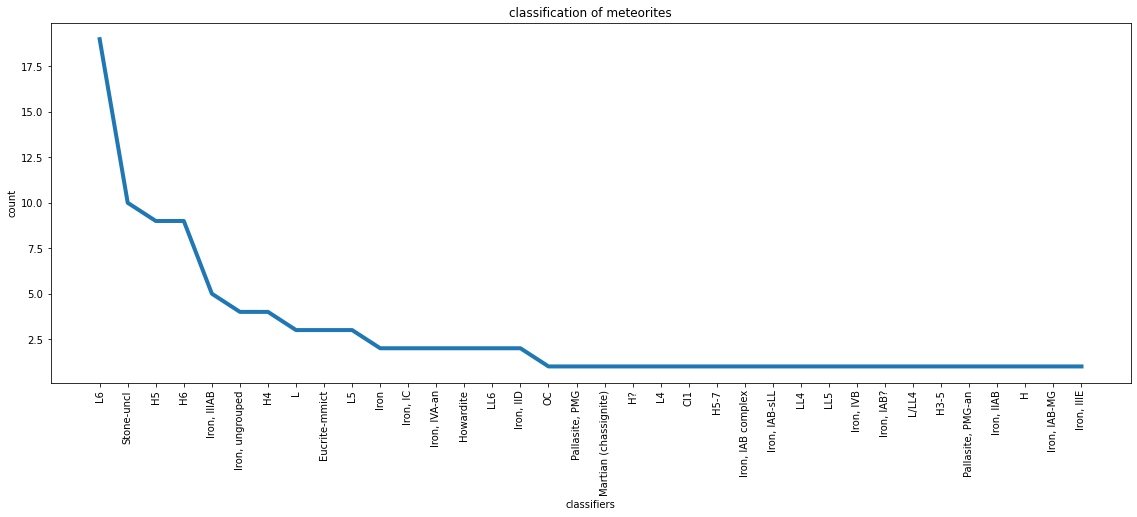

In [25]:
#plotting meteorite data
%matplotlib inline
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
ax.plot(sample_recclass.value_counts(), linewidth=4)
ax.set_title('classification of meteorites')
labels = ax.set_xticklabels(sample_recclass.value_counts().index, rotation=90)
ax.set_xlabel('classifiers')
ax.set_ylabel('count')

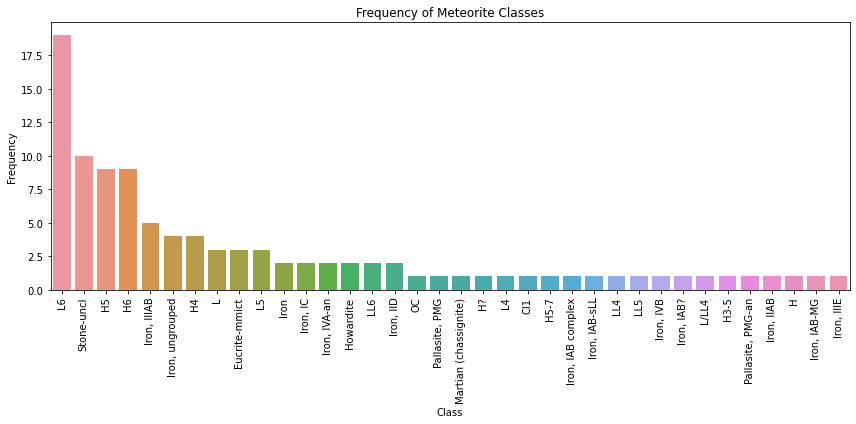

In [26]:
#plotting histogram for counts of meteorites
data = {
    'Class': ['L6', 'Stone-uncl', 'H5', 'H6', 'Iron, IIIAB', 'Iron, ungrouped', 'H4', 'L', 'Eucrite-mmict',
              'L5', 'Iron', 'Iron, IC', 'Iron, IVA-an', 'Howardite', 'LL6', 'Iron, IID', 'OC', 'Pallasite, PMG',
              'Martian (chassignite)', 'H?', 'L4', 'CI1', 'H5-7', 'Iron, IAB complex', 'Iron, IAB-sLL', 'LL4',
              'LL5', 'Iron, IVB', 'Iron, IAB?', 'L/LL4', 'H3-5', 'Pallasite, PMG-an', 'Iron, IIAB', 'H', 
              'Iron, IAB-MG', 'Iron, IIIE'],
    'Frequency': [19, 10, 9, 9, 5, 4, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
}

# Create DataFrame
data = pd.DataFrame(data)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Class', y='Frequency')
plt.xticks(rotation=90)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Frequency of Meteorite Classes')
plt.tight_layout()
plt.show()

In [27]:
#meteorites that fell vs found
df['fall'].value_counts()

Found    30848
Fell      1064
Name: fall, dtype: int64

Text(0.5, 1.0, 'count of meteorite fell vs found')

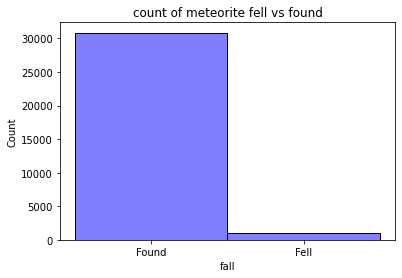

In [28]:
#Plotting Histogram on the Categorical data of Column 'fall'
sns.histplot(data=df['fall'], color='b', alpha=0.5).set_title('count of meteorite fell vs found')

([<matplotlib.patches.Wedge at 0x2c8468ceaf0>,
 [Text(-1.0939710601874346, 0.11501008422038683, 'Found'),
  Text(1.0939710548034227, -0.11501013543286864, 'Fell')],
 [Text(-0.5967114873749643, 0.06273277321112009, '96.67%'),
  Text(0.5967114844382305, -0.06273280114520106, '3.33%')])

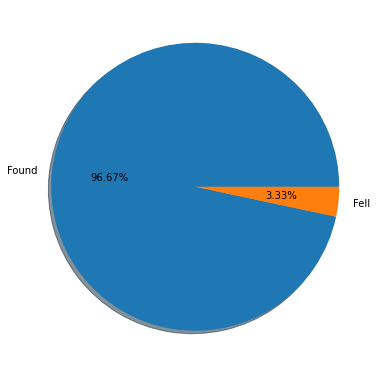

In [30]:
#pie chart for fallen and found
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.pie(df['fall'].value_counts(), labels=df['fall'].unique(), autopct='%0.2f%%', shadow=True)

In [32]:
#latest meteorite fell or found
df[df['year']==df['year'].max()]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
31911,Chelyabinsk,57165,Valid,LL5,100000.0,Fell,2013,54.81667,61.11667,"(54.816670, 61.116670)"


In [35]:
#Latest Meteorite Fell (Fall Observed)
df[(df['year']==df['year'].max()) & (df['fall']=='Fell')]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
31911,Chelyabinsk,57165,Valid,LL5,100000.0,Fell,2013,54.81667,61.11667,"(54.816670, 61.116670)"


In [41]:
#Latest Meteorite Found (Fall not Observed)
found = df[df['fall']=='Found']
df[(df['year']==found['year'].max()) & (df['fall']=='Found')]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
31897,Jiddat al Harasis 799,57428,Valid,LL6,212.0,Found,2012,19.77278,56.38982,"(19.772780, 56.389820)"
31898,Johannesburg,55765,Valid,H4,63.0,Found,2012,35.37788,-117.63728,"(35.377880, -117.637280)"
31899,Los Vientos 028,57338,Valid,H~5,12110.0,Found,2012,-24.68333,-69.76667,"(-24.683330, -69.766670)"
31900,Tupelo,56551,Valid,EL6,280.0,Found,2012,34.24216,-88.77594,"(34.242160, -88.775940)"
31901,Mandalay Spring,57454,Valid,L6,2854.0,Found,2012,40.89201,-118.55319,"(40.892010, -118.553190)"
31903,Antelope,57455,Valid,H4,754.0,Found,2012,40.90183,-118.54465,"(40.901830, -118.544650)"
31904,Catalina 009,57173,Valid,CR2,5.2,Found,2012,-25.23333,-69.71667,"(-25.233330, -69.716670)"
31906,Ksar Ghilane 011,55606,Valid,L4,25.6,Found,2012,32.89100,9.91300,"(32.891000, 9.913000)"
31907,Ksar Ghilane 010,55605,Valid,L5,50.1,Found,2012,32.80600,9.83300,"(32.806000, 9.833000)"
31908,Stewart Valley 012,55528,Valid,H6,130.0,Found,2012,36.23500,-116.18358,"(36.235000, -116.183580)"


In [42]:
#Oldest Meteorite Fell or Found
df[df['year']==df['year'].min()]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Wietrzno-Bobrka,24259,Valid,Iron,376.0,Found,601,49.41667,21.7,"(49.416670, 21.700000)"


In [43]:
#Oldest Meteorite Fell (Fall Observed)
fell = df[df['fall']=='Fell']
df[df['year'] == fell['year'].min()]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
1,Nogata,16988,Valid,L6,472.0,Fell,860,33.725,130.75,"(33.725000, 130.750000)"


In [44]:
#Oldest Meteorite Found (Fall not Observed)
df[(df['year']==df['year'].min()) & (df['fall']=='Found')]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Wietrzno-Bobrka,24259,Valid,Iron,376.0,Found,601,49.41667,21.7,"(49.416670, 21.700000)"


In [45]:
#Latest Meteorite Group by fell and found
fell_found = df.groupby('fall')
fell_found['year'].max()

fall
Fell     2013
Found    2012
Name: year, dtype: Int64

In [46]:
#Oldest Meteorite Group by fell and found
fell_found['year'].min()

fall
Fell     860
Found    601
Name: year, dtype: Int64

#### Heaviest and Lightest Meteorites Year-wise



In [47]:
#Heaviest Meteorites for each year
groupby_year = df.groupby('year')
groupby_year['mass'].max()

year
601         376.0
860         472.0
1399     107000.0
1490        103.3
1491     127000.0
          ...    
2009    1600000.0
2010     100000.0
2011      50000.0
2012      12110.0
2013     100000.0
Name: mass, Length: 253, dtype: float64

In [48]:
#Lightest Meteorites for each year
groupby_year['mass'].min()

year
601        376.00
860        472.00
1399    107000.00
1490       103.30
1491    127000.00
          ...    
2009         0.10
2010         0.18
2011         0.10
2012         5.20
2013    100000.00
Name: mass, Length: 253, dtype: float64

#### count of meteorites year wise

In [50]:
#Count of Meteorites in each year
df['year'].value_counts()

1979    3044
1988    2295
2003    1713
1999    1578
1990    1506
        ... 
1600       1
1583       1
1575       1
1491       1
2013       1
Name: year, Length: 253, dtype: Int64

#### Crosstab and Heatmap



In [51]:
#Crosstabulation between 'mass' and 'fall'
fall_mass = pd.crosstab(df['fall'].head(10),df['mass'].head(10))
fall_mass

mass,103.3,376.0,472.0,1967.0,10400.0,15000.0,107000.0,127000.0,10100000.0,50000000.0
fall,,,,,,,,,,
Fell,1,0,1,1,1,1,1,1,0,0
Found,0,1,0,0,0,0,0,0,1,1


<AxesSubplot:xlabel='mass', ylabel='fall'>

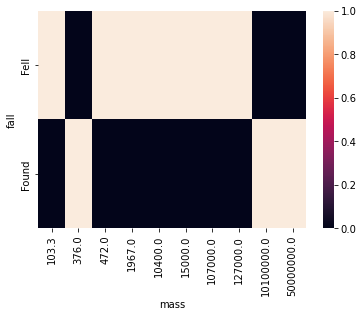

In [52]:
#Heatmap of Crosstabulation between 'mass' and 'fall'
sns.heatmap(fall_mass)

In [54]:
#Crosstabulation between 'fall' and 'year'
fall_year = pd.crosstab(df['fall'].head(10),df['year'].head(10))
fall_year

year,601,860,1399,1490,1491,1575,1583,1600,1621,1623
fall,,,,,,,,,,
Fell,0,1,1,1,1,0,1,0,1,1
Found,1,0,0,0,0,1,0,1,0,0


<AxesSubplot:xlabel='year', ylabel='fall'>

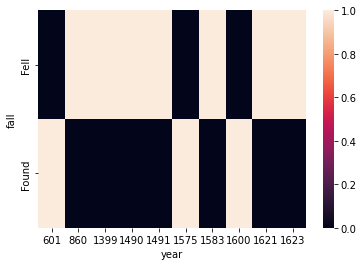

In [55]:
#Heatmap of Crosstabulation between 'fall' and 'year'
sns.heatmap(fall_year)
     

In [56]:
#Preprocessing of Mass
mass = df['mass']
mass = np.array(mass)
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
df['scaled_mass'] = minmax_scale.fit_transform(mass.reshape(len(mass),1))

In [57]:
df['scaled_mass']

0        6.266500e-06
1        7.866500e-06
2        1.783333e-03
3        1.721500e-06
4        2.116667e-03
             ...     
31907    8.348333e-07
31908    2.166500e-06
31909    1.848333e-07
31910    1.313983e-05
31911    1.666667e-03
Name: scaled_mass, Length: 31912, dtype: float64

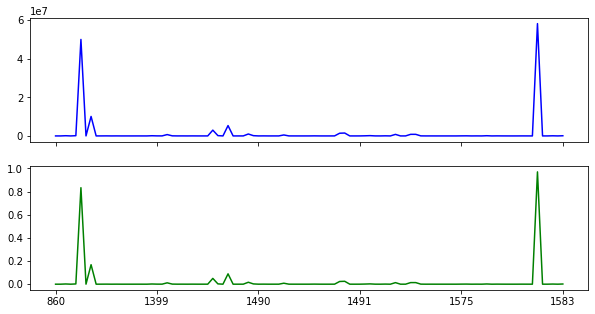

In [59]:
#Plotting Graph of Mass Vs Year and Scaled Mass Vs Year to make sure preproccessing is not wrong
%matplotlib inline
fig, ax = plt.subplots(2,1, sharex=True,figsize=(10,5))
ax[0].plot(df.loc[:100,'mass'],'b')
ax[1].plot(df.loc[:100,'scaled_mass'],'g')
labels = ax[0].set_xticklabels(df.loc[:100,'year'],rotation=0)

Text(0.5, 1.0, 'Plot showing most of the Meteorite landings (fell or found) has been in recent centuries')

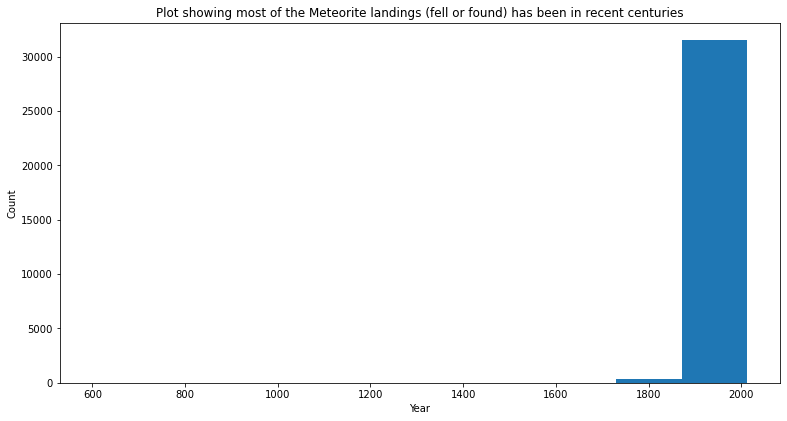

In [61]:
#Plotting Histogram for frequency of Meteorite Landings (in centuries)
%matplotlib inline
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.hist(df['year'])
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Plot showing most of the Meteorite landings (fell or found) has been in recent centuries')

Text(0.5, 1.0, 'Plot showing most of the Meteorite landings (found) has been in recent centuries')

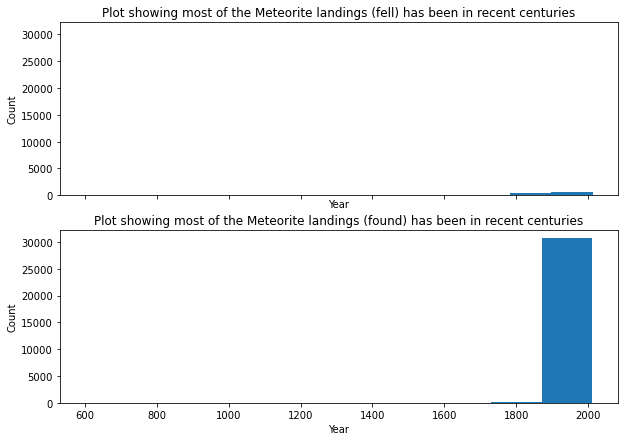

In [65]:
#Plotting Meteorite Landings fell and found
%matplotlib inline
fig, ax = plt.subplots(2,1, sharex=True,sharey=True,figsize=(10,7))
ax[0].hist(df['year'][df['fall']=='Fell'])
ax[1].hist(df['year'][df['fall']=='Found'])
for i in range(2):
  ax[i].set_xlabel('Year')
  ax[i].set_ylabel('Count')
ax[0].set_title('Plot showing most of the Meteorite landings (fell) has been in recent centuries')
ax[1].set_title('Plot showing most of the Meteorite landings (found) has been in recent centuries')

Text(0.5, 1.0, 'Plot showing most of the Meteorite landings (fell or found) has been in 21st century')

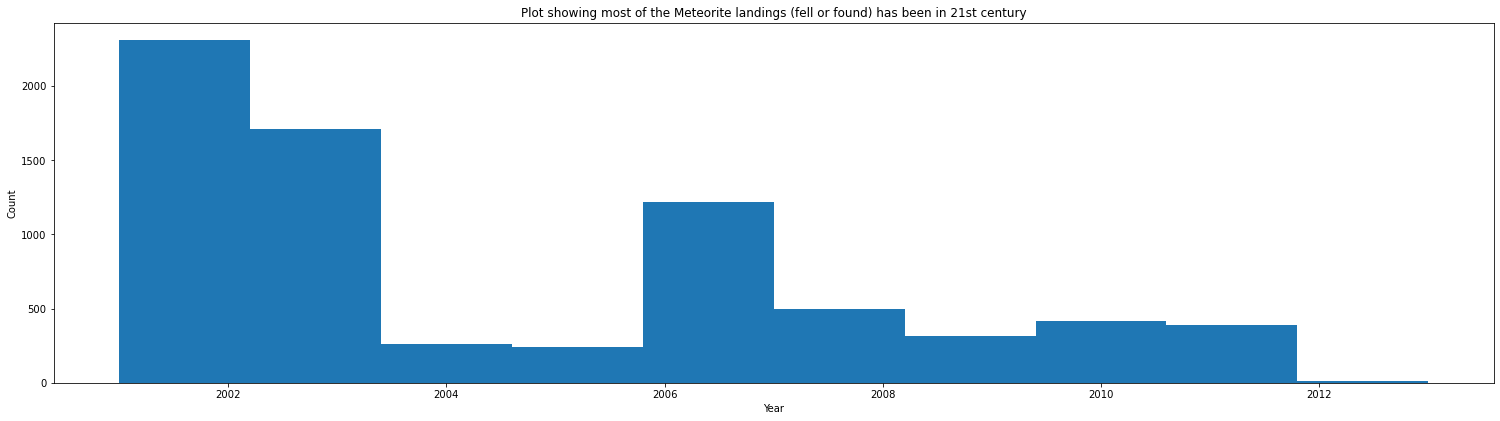

In [67]:
#Plotting Histogram for frequency of Meteorite Landings in 21st Century
%matplotlib inline
twenty = df[df['year']>2000]
fig = plt.figure(figsize=(20,5))
ax = fig.add_axes([0,0,1,1])
ax.hist(twenty['year'])
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Plot showing most of the Meteorite landings (fell or found) has been in 21st century')

<AxesSubplot:xlabel='year', ylabel='Density'>

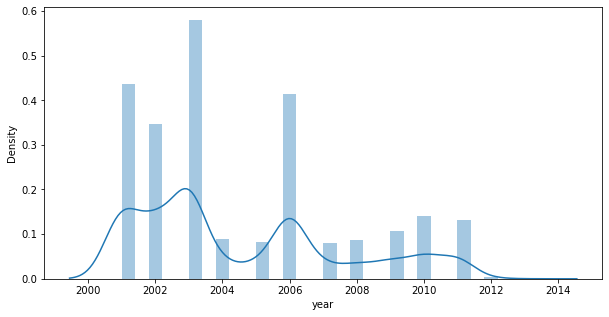

In [68]:
fig = plt.figure(figsize=(10,5))
sns.distplot(twenty['year'])

In [69]:
import folium

In [70]:
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,scaled_mass
0,Wietrzno-Bobrka,24259,Valid,Iron,376.0,Found,601,49.41667,21.70000,"(49.416670, 21.700000)",0.000006
1,Nogata,16988,Valid,L6,472.0,Fell,860,33.72500,130.75000,"(33.725000, 130.750000)",0.000008
2,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,1399,50.18333,12.73333,"(50.183330, 12.733330)",0.001783
3,Rivolta de Bassi,22614,Valid,Stone-uncl,103.3,Fell,1490,45.48333,9.51667,"(45.483330, 9.516670)",0.000002
4,Ensisheim,10039,Valid,LL6,127000.0,Fell,1491,47.86667,7.35000,"(47.866670, 7.350000)",0.002117


In [71]:
gel = df.iloc[:100,:]

In [72]:
met = folium.Map()

In [73]:
metf = folium.map.FeatureGroup()

In [74]:
for lat,lng in zip(gel.reclat,gel.reclong):
  metf.add_child(folium.features.Marker([lat,lng]))

In [75]:
met.add_child(metf)